In [1]:
from psycopg2 import connect
from modules.Cobertura import Cobertura
from modules.conector_postgree import Interface_db_postgree
from modules.conector_cassandra import Interface_db_cassandra
import pandas as pd
import numpy as np
from pyspark.sql import SparkSession
import psycopg2
from psycopg2.extras import execute_values
from cassandra.query import BatchStatement
from cassandra.cluster import Cluster, ProfileManager
import matplotlib.pyplot as plt

In [4]:
def chunk(dataframe, size):
    
    for i in range(0, len(dataframe), size): 
        yield dataframe[i:i + size]

In [7]:
lendo = Cobertura(r"C:\Users\isa66\Desktop\Visualcode\.vscode\Telecomunicações\arquivos\Municipios_acesso_cobertura\Meu_Municipio_Cobertura.csv")
lendo.tratamento_geral()
df_municipio_cobertura = lendo.get_resultado()
print('tratado')

tratado


In [8]:
chunked_municipio_cobertura = chunk(df_municipio_cobertura, 50000)

In [9]:
con = psycopg2.connect(user='postgres', password='Eugostode@55', host='localhost', database='telecomunicacao')
cursor = con.cursor()
print('conexao')

conexao


In [10]:
for df in chunked_municipio_cobertura:
    try:
        data = np.array(df)
        list_postgre = []
        for item in data:
            value = tuple(item)
            list_postgre.append(value)  
        # list_postgre = str(list_postgre)[1:-1]
        sql = f"INSERT INTO municipio_cobertura (operadora , tecnologia_cobertura , Moradores_cobertos , Domicilios_cobertos , Area_coberta , Moradores_municipio , domicilios_Municipio , Area_municipio , Ano , codigo_ibge , municipio , uf , nome_uf , regiao , codigo_nacional) values   %s;"
        execute_values(cursor, sql, list_postgre)
        con.commit()
        print('inerindo')
    except Exception as e:
        print("Erro ao inserir dados ", str(e))

inerindo
inerindo
inerindo
inerindo
inerindo
inerindo


In [11]:
conect_post = Interface_db_postgree('postgres','Eugostode@55', 'localhost', 'telecomunicacao')

In [26]:
dados_municipio_cobertura = conect_post.select(query=" select t1.*,  t2.Moradores_cobertos, t2.Domicilios_cobertos, t2.Area_coberta,  t3.Moradores_municipio, t3.domicilios_Municipio, t3.Area_municipio, t4.codigo_ibge, t4.municipio, t4.uf, t4.nome_uf, t4.regiao, t4.codigo_nacional  from Operadoras t1 inner join AreaCobertura t2  on t2.id_cobertura = t1.id_cobertura  inner join AreaMunipios t3 on t3.id_cobertura = t2.id_cobertura inner join LocaisCobertura t4 on t4.id_cobertura = t3.id_cobertura order by t1.id_cobertura;") 
df_municipio_cobertura = pd.DataFrame(dados_municipio_cobertura)
a = df_municipio_cobertura
print(a)

            0       1       2      3               4               5   \
0            1  2021.0   LIGUE     2G               0               0   
1            2  2021.0     TIM  3G+4G               0               0   
2            3  2021.0   LIGUE     3G               0               0   
3            4  2021.0    VIVO     4G               0               0   
4            5  2021.0   CLARO     2G  439,7331951305  132,9313969959   
...        ...     ...     ...    ...             ...             ...   
258790  258791     NaN  NEXTEL  Todas               0               0   
258791  258792     NaN      OI     3G               0               0   
258792  258793     NaN     TIM  3G+4G               0               0   
258793  258794     NaN  NEXTEL  3G+4G               0               0   
258794  258795     NaN   CLARO  3G+4G               0               0   

                     6       7       8                9        10  \
0                     0  6885.0  2174.0  369,861546188

In [28]:
query = """
    INSERT INTO municipio_cobertura (
            id_cobertura,
            Ano,
            operadora,
            tecnologia_cobertura,
            Moradores_cobertos,
            Domicilios_cobertos,
            Area_coberta,
            Moradores_municipio,
            domicilios_Municipio,
            Area_municipio,
            codigo_ibge,
            municipio,
            uf,
            nome_uf,
            regiao,
            codigo_nacional
    ) values (
        ?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
    )
"""

In [29]:
conect_cassa = Interface_db_cassandra('telecomunicacoes') 

In [30]:
insert = conect_cassa.connector().prepare(query)
chunked_df = chunk(df_municipio_cobertura, 100)
for df in chunked_df:
    batch = BatchStatement()
    for _, row in df.iterrows():
        batch.add(insert, tuple(row))
    print(">> executando batch")
    conect_cassa.inserir(batch)
print(">> dados inseridos")
    
print("inseriu tudo")

>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch
>> executando batch


In [2]:
conect_cassa = Cluster()
session = conect_cassa.connect("telecomunicacoes")

In [3]:
query = "SELECT * FROM municipio_cobertura;"
a = session.execute(query) 

In [4]:
lista = []
for i in a:
    lista.append(i)
b = pd.DataFrame(lista)
print(b)

        id_cobertura     ano     area_coberta   area_municipio codigo_ibge  \
0               4317  2021.0   69,73890277575  799,12408551743     5221452   
1              62693  2021.0                0  63,610377394616     2509156   
2             121478  2021.0                0  572,51843623917     2107209   
3             113295  2021.0                0  60,688100939982     4323804   
4             176996  2021.0  254,78349578062  762,34320480837     2602605   
...              ...     ...              ...              ...         ...   
258790         28249  2021.0  240,90544302484  1568,2230956416     2921203   
258791        246224  2021.0  6,8286802191965  295,83700486377     3103751   
258792         56818  2021.0                0  1264,2454948424     3111408   
258793        194721  2021.0  17,502204691266  626,71905647459     5221809   
258794        104823  2021.0  775,84320510443  3735,1640315279     4303004   

       codigo_nacional domicilios_cobertos domicilios_municipio

In [8]:
b.sort_values(by=['id_cobertura'], ascending=False, inplace=True)
# b['area_coberta'] = b['area_coberta'].str.replace(",", ".")
b['area_coberta'] = b['area_coberta'].astype(float, errors = 'raise')
centro_oeste = b.loc[b["regiao"] == 'Centro-oeste']
nordeste = b.loc[b["regiao"] == 'Nordeste']
norte = b.loc[b["regiao"] == 'Norte']
sudeste = b.loc[b["regiao"] == 'Sudeste'] 
sul = b.loc[b["regiao"]== 'Sul']


print(b.info())

dataframe_centro_oeste = centro_oeste.groupby("operadora").sum()
dataframe_centro_oeste.reset_index(inplace = True)
dataframe_nordeste = nordeste.groupby("operadora").sum()
dataframe_nordeste.reset_index(inplace = True)
dataframe_norte = norte.groupby("operadora").sum()
dataframe_norte.reset_index(inplace = True)
dataframe_sudeste = sudeste.groupby("operadora").sum()
dataframe_sudeste.reset_index(inplace = True)
dataframe_sul = sul.groupby("operadora").sum()
dataframe_sul.reset_index(inplace = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258795 entries, 51804 to 72867
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id_cobertura          258795 non-null  int64  
 1   ano                   258795 non-null  object 
 2   area_coberta          258795 non-null  float64
 3   area_municipio        258795 non-null  object 
 4   codigo_ibge           258795 non-null  object 
 5   codigo_nacional       258795 non-null  object 
 6   domicilios_cobertos   258795 non-null  object 
 7   domicilios_municipio  258795 non-null  object 
 8   moradores_cobertos    258795 non-null  object 
 9   moradores_municipio   258795 non-null  object 
 10  municipio             258795 non-null  object 
 11  nome_uf               258795 non-null  object 
 12  operadora             258795 non-null  object 
 13  regiao                258795 non-null  object 
 14  tecnologia_cobertura  258795 non-null  object 
 1

In [13]:
claro = b.loc[b["operadora"] == 'CLARO'] 


print(b.info())

dataframe_claro = claro.groupby("regiao").sum()
dataframe_claro.reset_index(inplace = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258795 entries, 51804 to 72867
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id_cobertura          258795 non-null  int64  
 1   ano                   258795 non-null  object 
 2   area_coberta          258795 non-null  float64
 3   area_municipio        258795 non-null  object 
 4   codigo_ibge           258795 non-null  object 
 5   codigo_nacional       258795 non-null  object 
 6   domicilios_cobertos   258795 non-null  object 
 7   domicilios_municipio  258795 non-null  object 
 8   moradores_cobertos    258795 non-null  object 
 9   moradores_municipio   258795 non-null  object 
 10  municipio             258795 non-null  object 
 11  nome_uf               258795 non-null  object 
 12  operadora             258795 non-null  object 
 13  regiao                258795 non-null  object 
 14  tecnologia_cobertura  258795 non-null  object 
 1

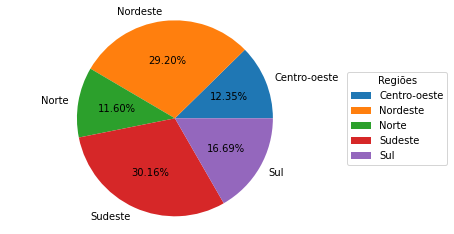

In [41]:
# plt.subplot(subplot_kw=dict(aspect="equal"))
plt.pie(dataframe_claro['area_coberta'], labels=dataframe_claro['regiao'],autopct='%1.2f%%')
# plt.setp(autotexts,size = 8, wight = "bold")
plt.legend(dataframe_claro['regiao'], title = 'Regiões',loc='center left', bbox_to_anchor = (1,0,0.5,1))
plt.axis('equal')
plt.show()